## Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_validate
#from feature_importance import FeatureImportance


## Load Data 

In [2]:
df_1921 = pd.read_csv('df_all_d_new.csv',index_col=[0])

In [4]:
df_1921.columns

Index(['sofifa_id', 'physic_21', 'defending_21', 'dribbling_21', 'passing_21',
       'shooting_21', 'pace_21', 'release_clause_eur_21',
       'international_reputation_21', 'skill_moves_21', 'weak_foot_21',
       'nation_team_id_21', 'club_contract_valid_until_21', 'league_level_21',
       'club_team_id_21', 'weight_kg_21', 'height_cm_21', 'age_21',
       'wage_eur_21', 'value_eur_21', 'potential_21', 'overall_21',
       'physic_20', 'defending_20', 'dribbling_20', 'passing_20',
       'shooting_20', 'pace_20', 'release_clause_eur_20',
       'international_reputation_20', 'skill_moves_20', 'weak_foot_20',
       'nation_team_id_20', 'club_contract_valid_until_20', 'league_level_20',
       'club_team_id_20', 'weight_kg_20', 'height_cm_20', 'age_20',
       'wage_eur_20', 'value_eur_20', 'potential_20', 'overall_20',
       'physic_19', 'defending_19', 'dribbling_19', 'passing_19',
       'shooting_19', 'pace_19', 'release_clause_eur_19',
       'international_reputation_19', 'sk

In [6]:
df_1921.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45629 entries, 0 to 45628
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sofifa_id                     45629 non-null  int64  
 1   physic_21                     16861 non-null  float64
 2   defending_21                  16861 non-null  float64
 3   dribbling_21                  16861 non-null  float64
 4   passing_21                    16861 non-null  float64
 5   shooting_21                   16861 non-null  float64
 6   pace_21                       16861 non-null  float64
 7   release_clause_eur_21         17949 non-null  float64
 8   international_reputation_21   18944 non-null  float64
 9   skill_moves_21                18944 non-null  float64
 10  weak_foot_21                  18944 non-null  float64
 11  nation_team_id_21             1127 non-null   float64
 12  club_contract_valid_until_21  18719 non-null  float64
 13  l

## Join Dataframes

In [7]:
df_22=pd.read_csv('../raw_data/fifa22/players_22.csv')
df_22=df_22[['sofifa_id','value_eur']]
df_22.head()

/var/folders/w7/n5m3c1_n3mn3b92rk5hw7msc0000gn/T/ipykernel_14923/3191243197.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_22=pd.read_csv('../raw_data/fifa22/players_22.csv')


,sofifa_id,value_eur
0,158023,78000000.0
1,188545,119500000.0
2,20801,45000000.0
3,190871,129000000.0
4,192985,125500000.0


In [10]:
df_all = df_1921.merge(df_22, how='inner',on='sofifa_id')


In [11]:
df_all.columns

Index(['sofifa_id', 'physic_21', 'defending_21', 'dribbling_21', 'passing_21',
       'shooting_21', 'pace_21', 'release_clause_eur_21',
       'international_reputation_21', 'skill_moves_21', 'weak_foot_21',
       'nation_team_id_21', 'club_contract_valid_until_21', 'league_level_21',
       'club_team_id_21', 'weight_kg_21', 'height_cm_21', 'age_21',
       'wage_eur_21', 'value_eur_21', 'potential_21', 'overall_21',
       'physic_20', 'defending_20', 'dribbling_20', 'passing_20',
       'shooting_20', 'pace_20', 'release_clause_eur_20',
       'international_reputation_20', 'skill_moves_20', 'weak_foot_20',
       'nation_team_id_20', 'club_contract_valid_until_20', 'league_level_20',
       'club_team_id_20', 'weight_kg_20', 'height_cm_20', 'age_20',
       'wage_eur_20', 'value_eur_20', 'potential_20', 'overall_20',
       'physic_19', 'defending_19', 'dribbling_19', 'passing_19',
       'shooting_19', 'pace_19', 'release_clause_eur_19',
       'international_reputation_19', 'sk

In [12]:
for index, col in enumerate(df_all.columns):
    print(f"{col:<26} | ", end="")
    if (index % 3 == 2):
        print("\n", end="")

sofifa_id                  | physic_21                  | defending_21               | 
dribbling_21               | passing_21                 | shooting_21                | 
pace_21                    | release_clause_eur_21      | international_reputation_21 | 
skill_moves_21             | weak_foot_21               | nation_team_id_21          | 
club_contract_valid_until_21 | league_level_21            | club_team_id_21            | 
weight_kg_21               | height_cm_21               | age_21                     | 
wage_eur_21                | value_eur_21               | potential_21               | 
overall_21                 | physic_20                  | defending_20               | 
dribbling_20               | passing_20                 | shooting_20                | 
pace_20                    | release_clause_eur_20      | international_reputation_20 | 
skill_moves_20             | weak_foot_20               | nation_team_id_20          | 
club_contract_valid_until_20

In [13]:
df_all

,sofifa_id,physic_21,defending_21,dribbling_21,passing_21,shooting_21,pace_21,release_clause_eur_21,international_reputation_21,skill_moves_21,...,league_level_19,club_team_id_19,weight_kg_19,height_cm_19,age_19,wage_eur_19,value_eur_19,potential_19,overall_19,value_eur
0,158023,65.0,38.0,95.0,91.0,92.0,85.0,138400000.0,5.0,4.0,...,1.0,241.0,72.0,170.0,31.0,575000.0,110500000.0,94.0,94.0,78000000.0
1,188545,82.0,43.0,85.0,78.0,91.0,78.0,132000000.0,4.0,4.0,...,1.0,21.0,80.0,184.0,29.0,200000.0,77000000.0,90.0,90.0,119500000.0
2,20801,77.0,35.0,89.0,81.0,93.0,89.0,75900000.0,5.0,5.0,...,1.0,45.0,83.0,187.0,33.0,400000.0,77000000.0,94.0,94.0,45000000.0
3,190871,59.0,36.0,94.0,86.0,85.0,91.0,166500000.0,5.0,5.0,...,1.0,73.0,68.0,175.0,26.0,300000.0,118500000.0,93.0,92.0,129000000.0
4,192985,78.0,64.0,88.0,93.0,86.0,76.0,161000000.0,4.0,4.0,...,1.0,10.0,70.0,181.0,27.0,350000.0,102000000.0,92.0,91.0,125500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000.0
19235,262040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110000.0
19236,262760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0
19237,262820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110000.0


In [14]:
df_all

,sofifa_id,physic_21,defending_21,dribbling_21,passing_21,shooting_21,pace_21,release_clause_eur_21,international_reputation_21,skill_moves_21,...,league_level_19,club_team_id_19,weight_kg_19,height_cm_19,age_19,wage_eur_19,value_eur_19,potential_19,overall_19,value_eur
0,158023,65.0,38.0,95.0,91.0,92.0,85.0,138400000.0,5.0,4.0,...,1.0,241.0,72.0,170.0,31.0,575000.0,110500000.0,94.0,94.0,78000000.0
1,188545,82.0,43.0,85.0,78.0,91.0,78.0,132000000.0,4.0,4.0,...,1.0,21.0,80.0,184.0,29.0,200000.0,77000000.0,90.0,90.0,119500000.0
2,20801,77.0,35.0,89.0,81.0,93.0,89.0,75900000.0,5.0,5.0,...,1.0,45.0,83.0,187.0,33.0,400000.0,77000000.0,94.0,94.0,45000000.0
3,190871,59.0,36.0,94.0,86.0,85.0,91.0,166500000.0,5.0,5.0,...,1.0,73.0,68.0,175.0,26.0,300000.0,118500000.0,93.0,92.0,129000000.0
4,192985,78.0,64.0,88.0,93.0,86.0,76.0,161000000.0,4.0,4.0,...,1.0,10.0,70.0,181.0,27.0,350000.0,102000000.0,92.0,91.0,125500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000.0
19235,262040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110000.0
19236,262760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0
19237,262820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110000.0


In [25]:
df_all=df_all.dropna(axis=0,thresh=50)

In [26]:
df_all.isnull().sum()

sofifa_id        0
physic_21        0
defending_21     0
dribbling_21     0
passing_21       0
                ..
wage_eur_19     24
value_eur_19    24
potential_19     0
overall_19       0
value_eur       25
Length: 65, dtype: int64

In [28]:
feat_categorical_nunique = df_all.select_dtypes("float64").nunique()
feat_categorical_nunique

physic_21        58
defending_21     75
dribbling_21     66
passing_21       65
shooting_21      75
               ... 
wage_eur_19      42
value_eur_19    203
potential_19     45
overall_19       47
value_eur       239
Length: 64, dtype: int64

In [40]:
df_all=df_all.drop(columns='sofifa_id')

KeyError: "['sofifa_id'] not found in axis"

In [41]:
df_all=df_all.fillna(df_all.mean())

In [42]:
df_all.head()

,physic_21,defending_21,dribbling_21,passing_21,shooting_21,pace_21,release_clause_eur_21,international_reputation_21,skill_moves_21,weak_foot_21,...,league_level_19,club_team_id_19,weight_kg_19,height_cm_19,age_19,wage_eur_19,value_eur_19,potential_19,overall_19,value_eur
0,65.0,38.0,95.0,91.0,92.0,85.0,138400000.0,5.0,4.0,4.0,...,1.0,241.0,72.0,170.0,31.0,575000.0,110500000.0,94.0,94.0,78000000.0
1,82.0,43.0,85.0,78.0,91.0,78.0,132000000.0,4.0,4.0,4.0,...,1.0,21.0,80.0,184.0,29.0,200000.0,77000000.0,90.0,90.0,119500000.0
2,77.0,35.0,89.0,81.0,93.0,89.0,75900000.0,5.0,5.0,4.0,...,1.0,45.0,83.0,187.0,33.0,400000.0,77000000.0,94.0,94.0,45000000.0
3,59.0,36.0,94.0,86.0,85.0,91.0,166500000.0,5.0,5.0,5.0,...,1.0,73.0,68.0,175.0,26.0,300000.0,118500000.0,93.0,92.0,129000000.0
4,78.0,64.0,88.0,93.0,86.0,76.0,161000000.0,4.0,4.0,5.0,...,1.0,10.0,70.0,181.0,27.0,350000.0,102000000.0,92.0,91.0,125500000.0


## Pipeline

In [30]:
# Preprocessor

# num_transformer = make_pipeline(SimpleImputer(), MinMaxScaler())

# cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=True)
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

num_transformer = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
num_col = make_column_selector(dtype_include=['int64','float64'])

cat_transformer = make_pipeline(SimpleImputer(strategy = 'most_frequent')
                                ,OneHotEncoder(handle_unknown='ignore', sparse=True)
                               )

cat_col = make_column_selector(dtype_include=['object','bool','category'])

preproc = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=['float64','int64'])),
    (cat_transformer, cat_col),
    remainder='passthrough')



# Add Estimator
# pipe = make_pipeline(preproc, Lasso(alpha=0.2))
pipe = make_pipeline(preproc, LinearRegression())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x150e495e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x150e494c0>)])),
                ('linearregression', LinearRegression())])

In [43]:
## Filter df_all to keep overall of 2022 and features of 2021


# 2021 features
# X=df_all.drop(columns='overall')
#cols = [col for col in df_all.columns if '_21' in col or 'value_eur' == col]

#df = df_all[cols]
#new_df = df[df['value_eur'].notnull()&df['short_name_21'].notnull()]
# df_all[cols].isna().sum()

# # new_df = df_all[cols].dropna(axis=0, how='all')
# # X = new_df.drop(columns='overall').dropna(axis=0)
X = df_all.drop(columns='value_eur')
# # cols
# # # X = df_all[cols].dropna(axis=0,how='all')
y = df_all.value_eur
# # # X
# # X

In [44]:
y=np.log(y)
y

0        18.172219
1        18.598827
2        17.622173
3        18.675323
4        18.647816
           ...    
18667    12.154779
18872    11.407565
18880    11.695247
18881    11.775290
19220    11.512925
Name: value_eur, Length: 7354, dtype: float64

In [45]:
X

,physic_21,defending_21,dribbling_21,passing_21,shooting_21,pace_21,release_clause_eur_21,international_reputation_21,skill_moves_21,weak_foot_21,...,club_contract_valid_until_19,league_level_19,club_team_id_19,weight_kg_19,height_cm_19,age_19,wage_eur_19,value_eur_19,potential_19,overall_19
0,65.0,38.0,95.0,91.0,92.0,85.0,138400000.0,5.0,4.0,4.0,...,2021.0,1.0,241.0,72.0,170.0,31.0,575000.0,110500000.0,94.0,94.0
1,82.0,43.0,85.0,78.0,91.0,78.0,132000000.0,4.0,4.0,4.0,...,2021.0,1.0,21.0,80.0,184.0,29.0,200000.0,77000000.0,90.0,90.0
2,77.0,35.0,89.0,81.0,93.0,89.0,75900000.0,5.0,5.0,4.0,...,2022.0,1.0,45.0,83.0,187.0,33.0,400000.0,77000000.0,94.0,94.0
3,59.0,36.0,94.0,86.0,85.0,91.0,166500000.0,5.0,5.0,5.0,...,2022.0,1.0,73.0,68.0,175.0,26.0,300000.0,118500000.0,93.0,92.0
4,78.0,64.0,88.0,93.0,86.0,76.0,161000000.0,4.0,4.0,5.0,...,2023.0,1.0,10.0,70.0,181.0,27.0,350000.0,102000000.0,92.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18667,51.0,42.0,55.0,50.0,42.0,68.0,214000.0,1.0,2.0,3.0,...,2019.0,4.0,143.0,66.0,178.0,17.0,1000.0,100000.0,66.0,53.0
18872,59.0,50.0,56.0,48.0,45.0,73.0,81000.0,1.0,2.0,3.0,...,2018.0,1.0,112977.0,78.0,184.0,21.0,2000.0,60000.0,60.0,51.0
18880,42.0,33.0,60.0,55.0,42.0,66.0,111000.0,1.0,3.0,3.0,...,2021.0,1.0,112393.0,60.0,173.0,21.0,3000.0,100000.0,65.0,53.0
18881,33.0,24.0,54.0,49.0,48.0,68.0,150000.0,1.0,2.0,3.0,...,2019.0,1.0,112224.0,60.0,167.0,17.0,1000.0,70000.0,68.0,51.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [47]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x150e495e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x150e494c0>)])),
                ('linearregression', LinearRegression())])

<BarContainer object of 21 artists>

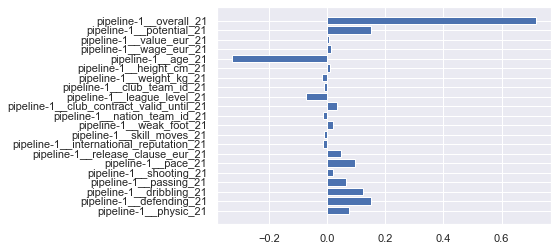

In [48]:
plt.barh(pipe[:-1].get_feature_names_out()[0:21],pipe[-1].coef_[0:21])


In [33]:
#(new_df.groupby('age_21','league_level_21')['value_eur'].agg(['var','median']))

In [34]:
len(pipe[:-1].get_feature_names_out())

12140

In [49]:
pipe.predict(X_test.iloc[0:2])

array([16.65894905, 14.02789346])

In [36]:
# pipe[-1].coef_[pipe[-1].coef_ != 0]
# plt.bar(pipe.feature_names_in_, pipe[-1].coef_)
# pipe.get_feature_names_out()
# pipe[:-1].get_feature_names_out()
# pipe[:-1].get_feature_names_out()
# pipe[:-1].named_steps["columntransformer"].get_feature_names_out()

In [50]:
from sklearn.model_selection import cross_val_score,cross_validate

# pipe.fit(X,y)
# pipe.score(X,y)
# pipe.predict(new_data)
cv_results = cross_validate(pipe, X_train, y_train, cv=5, 
                            scoring=['neg_mean_absolute_error','r2']
                           )
pd.DataFrame(cv_results)

,fit_time,score_time,test_neg_mean_absolute_error,test_r2
0,0.074822,0.003302,-0.332587,0.882191
1,0.045396,0.003398,-0.346101,0.867912
2,0.042636,0.002650,-0.334958,0.867472
3,0.051315,0.002421,-0.317977,0.880141
4,0.044351,0.002326,-0.352151,0.855259


In [51]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [52]:
predicted_overall = pipe.predict(X_test)
predicted_overall

array([16.65894905, 14.02789346, 13.88502318, ..., 14.55806935,
       16.36155328, 14.8136081 ])

In [53]:
predictions = {'y_pred' : predicted_overall,
             'y_true': y_test}

# comparison = pd.dataframe({y_true:[y_test22,pd.Series(predicted_overall,name ='Pred_Overall')],axis = 1)
# comparison

new_df=pd.DataFrame(predictions).sort_index()
new_df.head(30)

,y_pred,y_true
4,19.519137,18.647816
11,18.186127,18.005165
23,17.359158,17.611000
24,18.379414,18.132999
29,18.423813,18.739134
35,17.641320,18.005165
38,18.108746,18.191268
39,18.100321,18.320860
47,16.542155,16.300417
49,17.406317,17.599700


In [55]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predicted_overall))
rmse

0.4625018750222998

In [56]:
new_df[4:]

,y_pred,y_true
29,18.423813,18.739134
35,17.641320,18.005165
38,18.108746,18.191268
39,18.100321,18.320860
47,16.542155,16.300417
...,...,...
17828,12.222429,12.345835
18445,12.107198,12.206073
18447,11.686949,11.849398
18449,12.590548,12.254863


In [90]:
len(predicted_overall)

3975

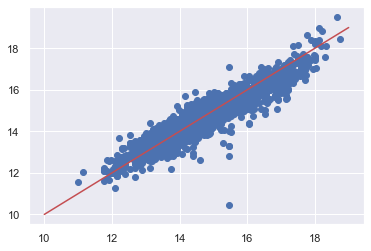

In [61]:
plt.scatter(y_test,predicted_overall)
plt.plot(range(10,20),range(10,20),c='r')
plt.show()